# Descargando la data de Kaggle

In [2]:
import os
!wget https://raw.githubusercontent.com/ronaldrodas/ai4eng-20242/main/kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

--2024-10-14 01:26:58--  https://raw.githubusercontent.com/ronaldrodas/ai4eng-20242/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      67  --.-KB/s    in 0s      

2024-10-14 01:26:58 (947 KB/s) - ‘kaggle.json’ saved [67/67]

 25% 5.00M/20.1M [00:00<00:00, 30.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 78.5MB/s]


# Unzip and inspect data

In [3]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc train.csv

   692501  10666231 118025055 train.csv


# Cargar datos de entrenamiento con panda


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
print ("shape of loaded dataframe", df.shape)

shape of loaded dataframe (692500, 12)


copia el DataFrame df en una nueva variable z, y luego muestra información básica sobre el número de filas, columnas y tipos de datos que contiene.

In [5]:
z = df.copy()
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

muestra las primeras 5 filas del DataFrame z. Esto te permite ver una vista previa rápida de los primeros registros de los datos.

In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


cuenta cuántos valores faltantes hay en cada columna del DataFrame z

In [ ]:
z.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


# ID

Verificar si hay valores duplicados en la columna ID

In [ ]:
if z['ID'].duplicated().any():
    print("Hay valores duplicados en la columna ID.")
else:
    print("No hay valores duplicados en la columna ID.")

No hay valores duplicados en la columna ID.


El código z.set_index('ID', inplace=True) establece la columna 'ID' como el índice del DataFrame z, y inplace=True hace que el cambio sea permanente en z; luego, z.head() muestra las primeras 5 filas del DataFrame con el nuevo índice.

In [ ]:
z.set_index('ID', inplace=True)
z.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
ID,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


imprime las nuevas dimensiones del DataFrame z

In [ ]:
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 11)


# PERIODO

devuelve un arreglo con todos los valores únicos que existen en la columna 'PERIODO' del DataFrame z, es decir, muestra cada valor sin repetir.

In [ ]:
z['PERIODO'].unique()

array([20212, 20203, 20195, 20183, 20194, 20213, 20184, 20202, 20196])

<Axes: xlabel='PERIODO'>

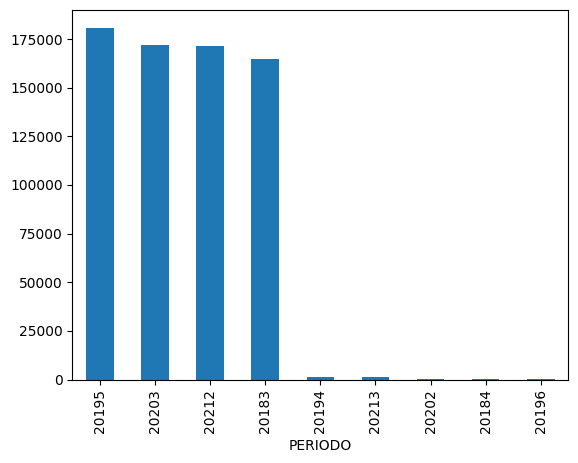

In [ ]:
z.PERIODO.value_counts().plot(kind='bar')

#  ESTU_PRGM_ACADEMICO

muestra la cantidad de ocurrencias de cada valor en la columna 'ESTU_PRGM_ACADEMICO' del DataFrame z, indicando cuántas veces aparece cada programa académico.

In [ ]:
print(z['ESTU_PRGM_ACADEMICO'].value_counts())

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


Este código realiza una serie de transformaciones en la columna ESTU_PRGM_ACADEMICO del DataFrame z para limpiar y agrupar los programas académicos:

In [6]:
!pip install unidecode
from unidecode import unidecode
import re

# Convertir la columna ESTU_PRGM_ACADEMICO a mayúsculas y eliminar tildes y espacios innecesarios
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].str.upper()  # Todo mayúsculas
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].apply(lambda x: unidecode(x).strip())  # Eliminar tildes
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())  # Eliminar dobles espacios
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].apply(lambda x: re.sub(r'^PROFESIONAL EN\s+', '', x).strip())  # "PROFESIONAL EN ..." redundante

# Corrección de errores comunes y caracteres especiales
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'DISE\?\?O', 'DISEÑO', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'INGENIIERIA', 'INGENIERIA', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'ADMINSITRACION', 'ADMINISTRACION', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'QU\?MICA', 'QUIMICA', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'COMUNICACI\?N', 'COMUNICACION', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'.*GASTRONOM.*', 'GASTRONOMIA', regex=True)

# Correcciones específicas de las palabras con caracteres mal codificados
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'INGENIER\?A', 'INGENIERIA', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'ADMINISTRACI\?N', 'ADMINISTRACION', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'GEOLOG\?A', 'GEOLOGIA', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'ECONOM\?A', 'ECONOMIA', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'ADMINISTRACI\?N P\?BLICA', 'ADMINISTRACION PUBLICA', regex=True)
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(r'INGENIER\?A EL\?CTRICA', 'INGENIERIA ELECTRICA', regex=True)

# Agrupaciones más amplias de carreras afines, con un enfoque agresivo en la agrupación de "Diseño" y otras categorías
grouping = {
    r'.*MEDICINA.*|.*ENFERMERIA.*|.*FARMACIA.*|.*SALUD.*|.*TERAPIA.*|.*OPTOMETRIA.*|.*ZOOTECNIA.*|.*BACTERIOLOGIA.*': 'CIENCIAS DE LA SALUD',
    r'.*SOCIOLOGIA.*|.*PSICOLOGIA.*|.*HUMANIDADES.*|.*HISTORIA.*|.*FILOSOFIA.*|.*FILOLOGIA.*|.*LITERATURA.*|.*CIENCIAS SOCIALES.*|.*CIENCIA POLITICA.*|.*CIENCIAS RELIGIOSAS.*|.*ANTROPOLOGIA.*': 'CIENCIAS SOCIALES',
    r'.*INGENIERIA.*|.*ELECTRONICA.*|.*INFORMATICA.*|.*SISTEMAS.*|.*TECNOLOGIA.*|.*INGENIERIA DE SOFTWARE.*|.*INGENIERIA INDUSTRIAL.*|.*INGENIERIA ELECTRICA.*': 'INGENIERIA Y TECNOLOGIA',
    r'.*EDUCACION.*|.*PEDAGOGIA.*|.*LICENCIATURA.*': 'EDUCACION',
    r'.*ADMINISTRACION.*|.*NEGOCIOS.*|.*CONTADURIA.*|.*FINANZAS.*|.*MERCAD.*|.*GOBIERNO.*|.*COMERCIO.*|.*ADMINISTRACION PUBLICA.*': 'ADMINISTRACION Y NEGOCIOS',
    r'.*ARTES.*|.*MUSICA.*|.*DANZA.*|.*TEATRO.*|.*COMUNICACION.*|.*PUBLICIDAD.*|.*CINE.*': 'ARTES Y COMUNICACION',
    r'.*MATEMATICAS.*|.*FISICA.*|.*QUIMICA.*|.*BIOLOGIA.*|.*CIENCIAS EXACTAS.*|.*CIENCIAS NATURALES.*|.*ECOLOGIA.*|.*GEOLOGIA.*': 'CIENCIAS EXACTAS Y NATURALES',
    r'.*DERECHO.*|.*JURISPRUDENCIA.*': 'DERECHO',
    r'.*DEPORT.*|.*RECREACION.*|.*EDUCACION FISICA.*|.*DEPORTES.*|.*ADMINISTRACION DEPORTIVA.*': 'DEPORTES Y RECREACION',
    r'.*AGRONOMIA.*|.*VETERINARIA.*|.*ZOO.*|.*ACUICULTURA.*|.*AGROINDUSTRIA.*': 'AGRONOMIA Y VETERINARIA',
    r'.*ARQUITECTURA.*|.*CONSTRUCCION.*|.*URBANISMO.*': 'ARQUITECTURA Y CONSTRUCCION',
    r'.*IDIOMAS.*|.*LENGUAS.*|.*TRADUCCION.*|.*BILINGUISMO.*': 'IDIOMAS Y LENGUAS EXTRANJERAS',
    r'.*ESTADISTICA.*|.*CIENCIAS POLITICAS.*|.*LENGUA CASTELLANA.*|.*PLANEACION.*|.*GESTION.*': 'OTROS CAMPOS',
    r'.*DISENO.*|.*DISEÑO.*|.*MODA.*|.*CROSSMEDIA.*|.*DIGITAL.*|.*INTERACTIVO.*|.*INDUSTRIAL.*|.*VESTUARIO.*|.*MULTIMEDIA.*': 'DISEÑO'
}

# Aplicar las agrupaciones usando regex
for pattern, replacement in grouping.items():
    z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(pattern, replacement, regex=True)

# Mostrar los resultados simplificados
print(z['ESTU_PRGM_ACADEMICO'].value_counts())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00
ESTU_PRGM_ACADEMICO
ADMINISTRACION Y NEGOCIOS     188554
INGENIERIA Y TECNOLOGIA       149710
CIENCIAS DE LA SALUD           70507
CIENCIAS SOCIALES              68748
DERECHO                        54556
                               ...  
DIRECCION DE BANDA                10
COMPUTACION CIENTIFICA             5
OCEANOGRAFIA                       4
ANIMACION                          2
CIENCIAS DE LA COMPUTACION         1
Name: count, Length: 81, dtype: int64


Contar la cantidad de ocurrencias de cada valor único en la columna "ESTU_PRGM_ACADEMICO"

In [7]:
pd.set_option('display.max_rows', None)
conteo_programas = z["ESTU_PRGM_ACADEMICO"].value_counts()
print(conteo_programas)
pd.reset_option('display.max_rows')

ESTU_PRGM_ACADEMICO
ADMINISTRACION Y NEGOCIOS                                                    188554
INGENIERIA Y TECNOLOGIA                                                      149710
CIENCIAS DE LA SALUD                                                          70507
CIENCIAS SOCIALES                                                             68748
DERECHO                                                                       54556
EDUCACION                                                                     53960
ARTES Y COMUNICACION                                                          24764
TRABAJO SOCIAL                                                                13101
ARQUITECTURA Y CONSTRUCCION                                                   12079
CIENCIAS EXACTAS Y NATURALES                                                  11318
DISEÑO                                                                         9539
ECONOMIA                                                

<Axes: xlabel='ESTU_PRGM_ACADEMICO'>

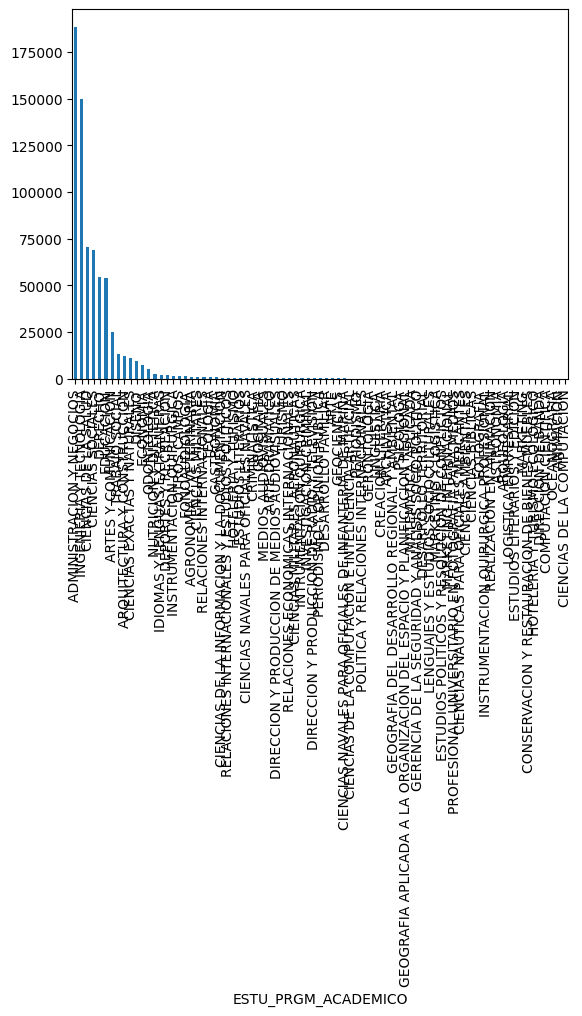

In [8]:
z.ESTU_PRGM_ACADEMICO.value_counts().plot(kind='bar')

#  ESTU_PRGM_DEPARTAMENTO

cuenta cuántas veces aparece cada valor en la columna ESTU_PRGM_DEPARTAMENTO, mostrando la cantidad de registros para cada departamento

In [ ]:
z['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

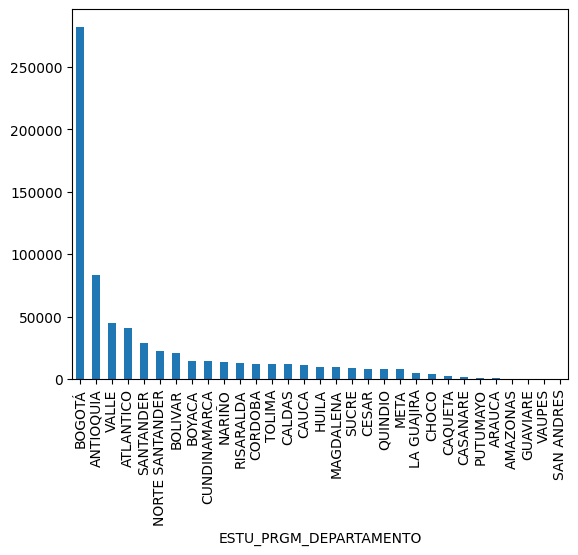

In [ ]:
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

# ESTU_VALORMATRICULAUNIVERSIDAD

muestra un arreglo con todos los valores únicos que existen en la columna ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
z['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
z['ESTU_VALORMATRICULAUNIVERSIDAD'].isna().sum()

6287

reemplaza los valores nulos en la columna ESTU_VALORMATRICULAUNIVERSIDAD del DataFrame z con el texto 'No pagó matrícula'

In [ ]:
z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna('No pagó matrícula')

In [ ]:
z['ESTU_VALORMATRICULAUNIVERSIDAD'].isna().sum()

0

In [ ]:
z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,25815


<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

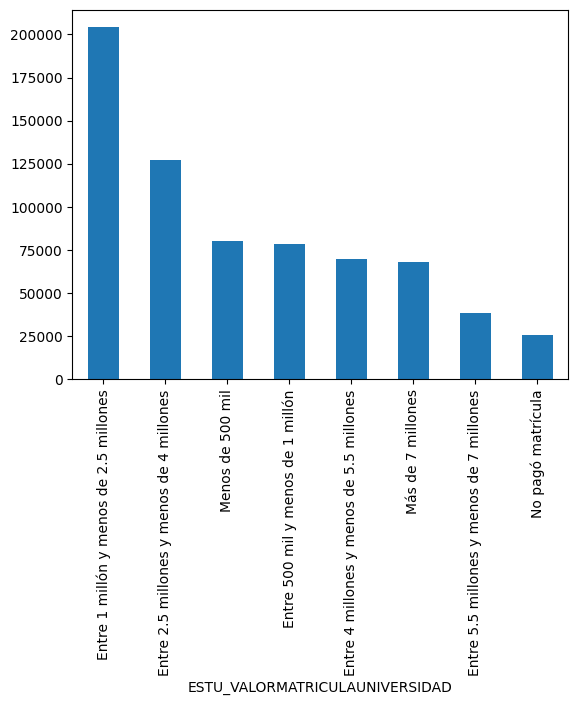

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

# ESTU_HORASSEMANATRABAJA

muestra un arreglo con todos los valores únicos que existen en la columna ESTU_HORASSEMANATRABAJA

In [ ]:
z['ESTU_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
z['ESTU_HORASSEMANATRABAJA'].isna().sum()

30857

 reemplaza los valores nulos en la columna ESTU_HORASSEMANATRABAJA del DataFrame z con el texto '0'

In [ ]:
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].fillna('0')

In [ ]:
z['ESTU_HORASSEMANATRABAJA'].isna().sum()

0

In [ ]:
z['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,147407
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

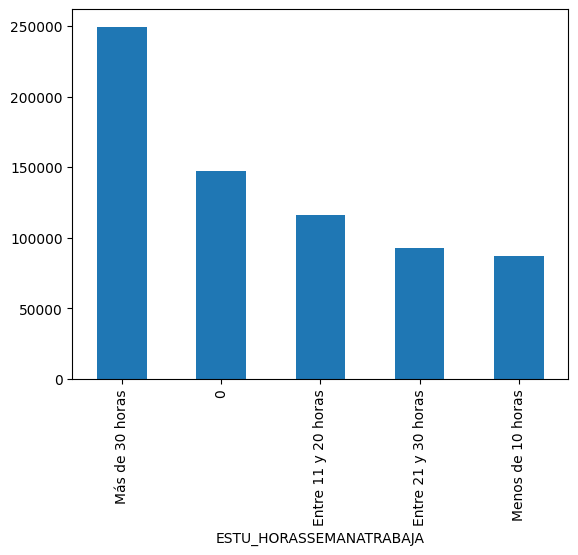

In [ ]:
z.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

# FAMI_ESTRATOVIVIENDA

muestra un arreglo con todos los valores únicos que existen en la columna FAMI_ESTRATOVIVIENDA

In [ ]:
z['FAMI_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna FAMI_ESTRATOVIVIENDA

In [ ]:
z['FAMI_ESTRATOVIVIENDA'].isna().sum()

32137

reemplaza los valores nulos en la columna FAMI_ESTRATOVIVIENDA del DataFrame z con el texto 'Sin Estrato'

In [ ]:
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].fillna('Sin Estrato')

In [ ]:
z['FAMI_ESTRATOVIVIENDA'].isna().sum()

0

In [ ]:
z['FAMI_ESTRATOVIVIENDA'].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Sin Estrato,35426
Estrato 5,23608
Estrato 6,12605


<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

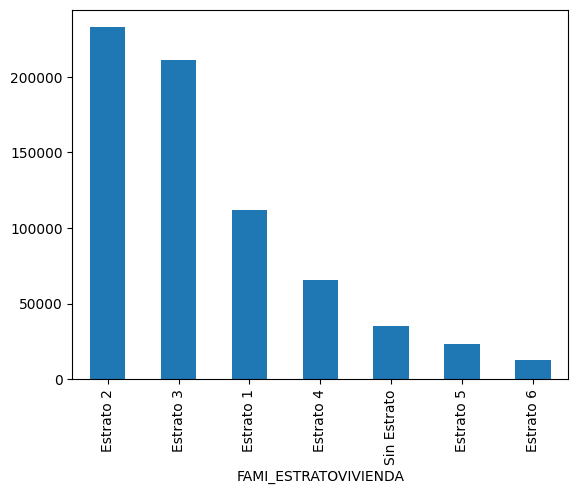

In [ ]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

# FAMI_TIENEINTERNET

muestra un arreglo con todos los valores únicos que existen en la columna FAMI_TIENEINTERNET

In [ ]:
z['FAMI_TIENEINTERNET'].unique()

array(['Si', 'No', nan], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna FAMI_TIENEINTERNET

In [ ]:
z['FAMI_TIENEINTERNET'].isna().sum()

26629

reemplaza los valores nulos en la columna FAMI_TIENEINTERNET

In [ ]:
z['FAMI_TIENEINTERNET'] = z['FAMI_TIENEINTERNET'].fillna("No")

In [ ]:
z['FAMI_TIENEINTERNET'].isna().sum()

0

In [ ]:
z['FAMI_TIENEINTERNET'].value_counts()

,count
FAMI_TIENEINTERNET,
Si,592514
No,99986


<Axes: xlabel='FAMI_TIENEINTERNET'>

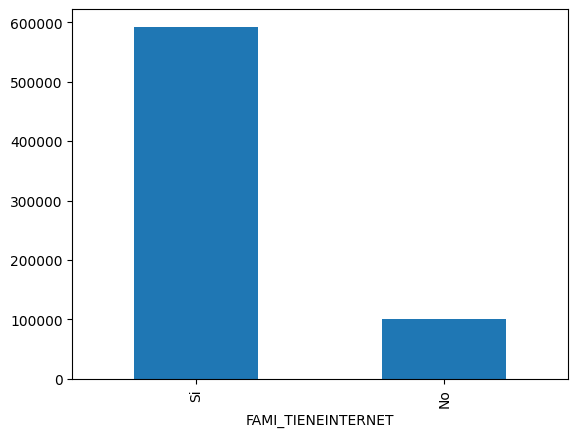

In [ ]:
z.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

# FAMI_EDUCACIONPADRE

muestra un arreglo con todos los valores únicos que existen en la columna FAMI_EDUCACIONPADRE

In [ ]:
z['FAMI_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', nan, 'Secundaria (Bachillerato) incompleta',
       'Ninguno', 'No Aplica'], dtype=object)

In [ ]:
z['FAMI_EDUCACIONPADRE'].value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


cuenta cuántos valores faltantes (nulos) hay en la columna FAMI_EDUCACIONPADRE

In [ ]:
z['FAMI_EDUCACIONPADRE'].isna().sum()

23178

In [ ]:
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(r'No Aplica', 'No sabe')
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].fillna('No sabe')

In [ ]:
z['FAMI_EDUCACIONPADRE'].isna().sum()

0

In [ ]:
z['FAMI_EDUCACIONPADRE'].value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
No sabe,48999
Postgrado,44169
Educación profesional incompleta,27084


<Axes: xlabel='FAMI_EDUCACIONPADRE'>

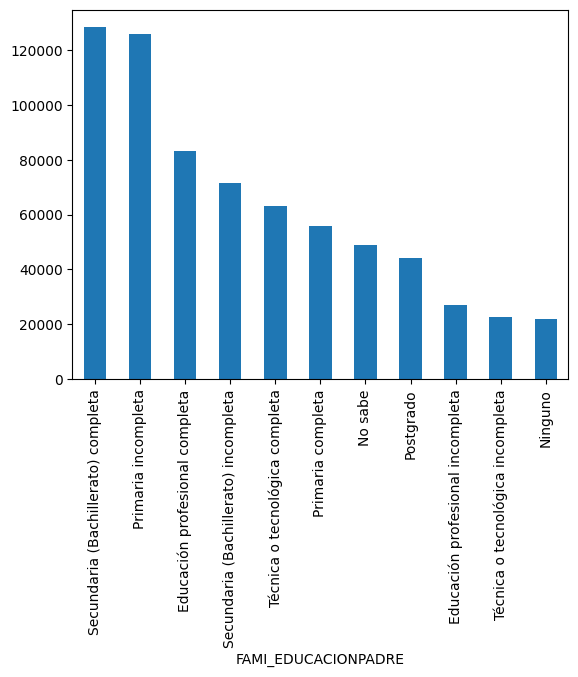

In [ ]:
z.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

# FAMI_EDUCACIONMADRE

muestra un arreglo con todos los valores únicos que existen en la columna FAMI_EDUCACIONMADRE

In [ ]:
z['FAMI_EDUCACIONMADRE'].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', nan,
       'Ninguno', 'No Aplica', 'No sabe'], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna FAMI_EDUCACIONMADRE

In [ ]:
z['FAMI_EDUCACIONMADRE'].isna().sum()

23664

In [ ]:
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(r'No Aplica', 'No sabe')
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].fillna('No sabe')

In [ ]:
z['FAMI_EDUCACIONMADRE'].isna().sum()

0

In [ ]:
z['FAMI_EDUCACIONMADRE'].value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
No sabe,28599
Técnica o tecnológica incompleta,27533


<Axes: xlabel='FAMI_EDUCACIONMADRE'>

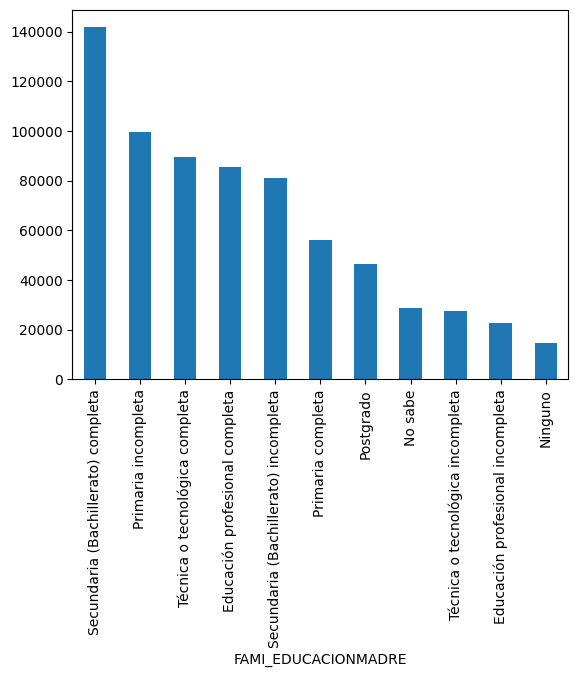

In [ ]:
z.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

# ESTU_PAGOMATRICULAPROPIO

muestra un arreglo con todos los valores únicos que existen en la columna ESTU_PAGOMATRICULAPROPIO

In [ ]:
z['ESTU_PAGOMATRICULAPROPIO'].unique()

array(['No', 'Si', nan], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna ESTU_PAGOMATRICULAPROPIO

---



In [ ]:
z['ESTU_PAGOMATRICULAPROPIO'].isna().sum()

6498

In [ ]:
z['ESTU_PAGOMATRICULAPROPIO'] = z['ESTU_PAGOMATRICULAPROPIO'].fillna("No")

In [ ]:
z['ESTU_PAGOMATRICULAPROPIO'].isna().sum()

0

In [ ]:
z['ESTU_PAGOMATRICULAPROPIO'].value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,388699
Si,303801


<Axes: xlabel='ESTU_PAGOMATRICULAPROPIO'>

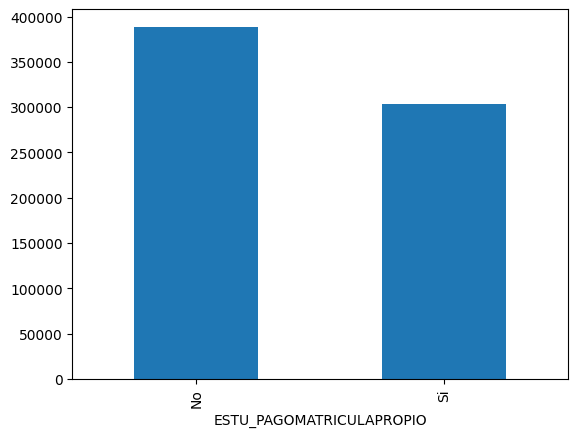

In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.value_counts().plot(kind='bar')

# RENDIMIENTO_GLOBAL

muestra un arreglo con todos los valores únicos que existen en la columna RENDIMIENTO_GLOBAL

In [ ]:
z['RENDIMIENTO_GLOBAL'].unique()

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

cuenta cuántos valores faltantes (nulos) hay en la columna RENDIMIENTO_GLOBAL

In [ ]:
z['RENDIMIENTO_GLOBAL'].isna().sum()

0

El código z.isnull().sum() cuenta cuántos valores nulos (faltantes) hay en cada columna del DataFrame z y muestra el resultado, permitiendo ver qué columnas aún tienen valores faltantes.

In [ ]:
z.isnull().sum()

,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_EDUCACIONMADRE,0
ESTU_PAGOMATRICULAPROPIO,0


El código z.info() muestra un resumen del DataFrame z con el número de filas, columnas, tipos de datos y cuántos valores no nulos hay en cada columna.

In [ ]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692500 entries, 904256 to 933374
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   PERIODO                         692500 non-null  int64 
 1   ESTU_PRGM_ACADEMICO             692500 non-null  object
 2   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 3   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  object
 4   ESTU_HORASSEMANATRABAJA         692500 non-null  object
 5   FAMI_ESTRATOVIVIENDA            692500 non-null  object
 6   FAMI_TIENEINTERNET              692500 non-null  object
 7   FAMI_EDUCACIONPADRE             692500 non-null  object
 8   FAMI_EDUCACIONMADRE             692500 non-null  object
 9   ESTU_PAGOMATRICULAPROPIO        692500 non-null  object
 10  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(1), object(10)
memory usage: 63.4+ MB


# One-Hot Encoding

El código aplica One-Hot Encoding a las columnas categóricas del DataFrame z y convierte los valores booleanos resultantes en enteros (0 y 1).

In [ ]:
print(z.dtypes)  # Verificar los tipos de datos en tu DataFrame

object_columns = z.select_dtypes(include=['object']).columns   # Seleccionar solo las columnas de tipo 'object'

z = pd.get_dummies(z, columns=object_columns, drop_first=False)   # Aplicar One-Hot Encoding en las columnas de tipo object (sin eliminar la primera categoría)
z = z.astype(int)  # Convertir columnas booleanas (True/False) a enteros (0 y 1)

PERIODO                                          int64
ESTU_PRGM_ACADEMICO_ADMINISTRACION Y NEGOCIOS    int64
ESTU_PRGM_ACADEMICO_AGRONOMIA Y VETERINARIA      int64
ESTU_PRGM_ACADEMICO_ANIMACION                    int64
ESTU_PRGM_ACADEMICO_ARCHIVISTICA                 int64
                                                 ...  
ESTU_PAGOMATRICULAPROPIO_Si                      int64
RENDIMIENTO_GLOBAL_alto                          int64
RENDIMIENTO_GLOBAL_bajo                          int64
RENDIMIENTO_GLOBAL_medio-alto                    int64
RENDIMIENTO_GLOBAL_medio-bajo                    int64
Length: 163, dtype: object


In [ ]:
z.head()

,PERIODO,ESTU_PRGM_ACADEMICO_ADMINISTRACION Y NEGOCIOS,ESTU_PRGM_ACADEMICO_AGRONOMIA Y VETERINARIA,ESTU_PRGM_ACADEMICO_ANIMACION,ESTU_PRGM_ACADEMICO_ARCHIVISTICA,ESTU_PRGM_ACADEMICO_ARQUEOLOGIA,ESTU_PRGM_ACADEMICO_ARQUITECTURA Y CONSTRUCCION,ESTU_PRGM_ACADEMICO_ARTE,ESTU_PRGM_ACADEMICO_ARTE DRAMATICO,ESTU_PRGM_ACADEMICO_ARTES Y COMUNICACION,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL_alto,RENDIMIENTO_GLOBAL_bajo,RENDIMIENTO_GLOBAL_medio-alto,RENDIMIENTO_GLOBAL_medio-bajo
ID,,,,,,,,,,,,,,,,,,,,,
904256,20212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
645256,20212,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
308367,20203,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
470353,20195,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
989032,20212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
z.isnull().sum()

,0
PERIODO,0
ESTU_PRGM_ACADEMICO_ADMINISTRACION Y NEGOCIOS,0
ESTU_PRGM_ACADEMICO_AGRONOMIA Y VETERINARIA,0
ESTU_PRGM_ACADEMICO_ANIMACION,0
ESTU_PRGM_ACADEMICO_ARCHIVISTICA,0
...,...
ESTU_PAGOMATRICULAPROPIO_Si,0
RENDIMIENTO_GLOBAL_alto,0
RENDIMIENTO_GLOBAL_bajo,0
RENDIMIENTO_GLOBAL_medio-alto,0


guarda el DataFrame z en un archivo CSV llamado 'z.csv'

In [ ]:
z.to_csv('z.csv', index=False)